In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.datasets import fashion_mnist
import Mnist_cnn
import Mnist_mlp
import Cifar10_cnn
import matplotlib.pyplot as plt

### Data Visualization

In [2]:
def Data_inform(data):
    print("Sample size: ",data.size)     
    print("Sample Shape: ",data.shape)  
    print("Classes num: ",len(np.unique(data)), '\n')

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('minist x_train')
Data_inform(x_train)
print('minist y_train')
Data_inform(y_train)
print('minist x_test')
Data_inform(x_test)
print('minist y_test')
Data_inform(y_test)


minist x_train
Sample size： 47040000
Sample Shape： (60000, 28, 28)
Classes num： 256 

minist y_train
Sample size： 60000
Sample Shape： (60000,)
Classes num： 10 

minist x_test
Sample size： 7840000
Sample Shape： (10000, 28, 28)
Classes num： 256 

minist y_test
Sample size： 10000
Sample Shape： (10000,)
Classes num： 10 



### Minist CNN

Minist CNN
===================== 0 =====================
['Ones', 'sigmoid', 'SGD', 'l1', True]
Train loss: 3.0836126804351807
Train accuracy: 0.10000000149011612
Test loss: 3.0836100578308105
Test accuracy: 0.10000000149011612


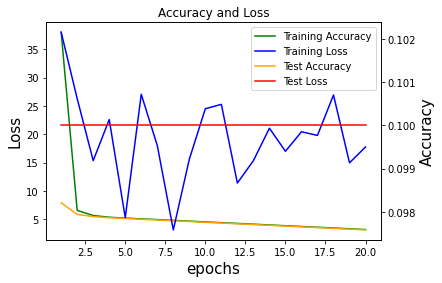

===================== 1 =====================
['Ones', 'relu', 'Adadelta', 'l2', True]
Train loss: 6.1028852462768555
Train accuracy: 0.7693333625793457
Test loss: 6.119638919830322
Test accuracy: 0.7558000087738037


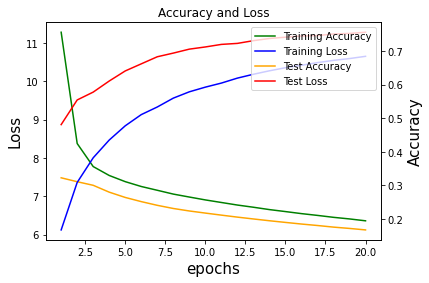

===================== 2 =====================
['Ones', 'tanh', 'Adam', 'l1', False]
Train loss: 2.5338196754455566
Train accuracy: 0.799049973487854
Test loss: 2.5476090908050537
Test accuracy: 0.7942000031471252


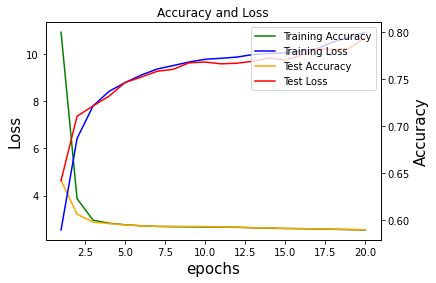

===================== 3 =====================
['Ones', 'softmax', 'RMSprop', 'l2', False]
Train loss: 2.305634021759033
Train accuracy: 0.10000000149011612
Test loss: 2.3056321144104004
Test accuracy: 0.10000000149011612


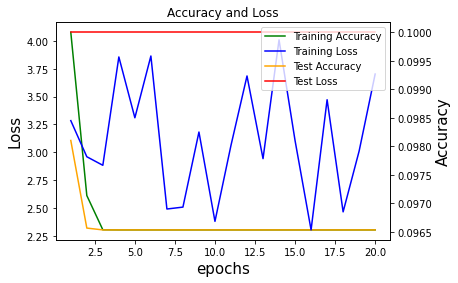

===================== 4 =====================
['Zeros', 'sigmoid', 'Adadelta', 'l1', False]
Train loss: 5.517179489135742
Train accuracy: 0.10000000149011612
Test loss: 5.517177581787109
Test accuracy: 0.10000000149011612


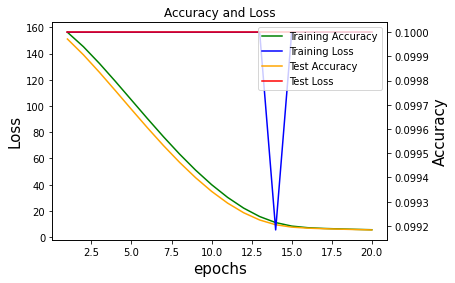

===================== 5 =====================
['Zeros', 'relu', 'SGD', 'l2', False]
Train loss: 2.3764142990112305
Train accuracy: 0.10000000149011612
Test loss: 2.376415252685547
Test accuracy: 0.10000000149011612


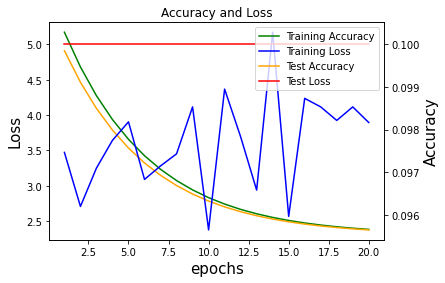

===================== 6 =====================
['Zeros', 'tanh', 'RMSprop', 'l1', True]
Train loss: 8.229098320007324
Train accuracy: 0.10000000149011612
Test loss: 8.229106903076172
Test accuracy: 0.10000000149011612


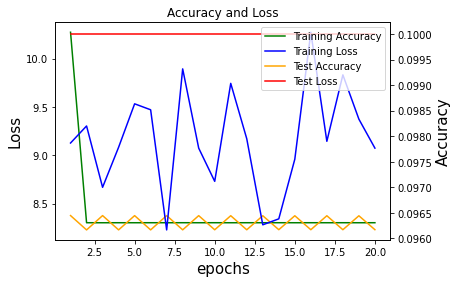

===================== 7 =====================
['Zeros', 'softmax', 'Adam', 'l2', True]
Train loss: 2.3027312755584717
Train accuracy: 0.10000000149011612
Test loss: 2.302729606628418
Test accuracy: 0.10000000149011612


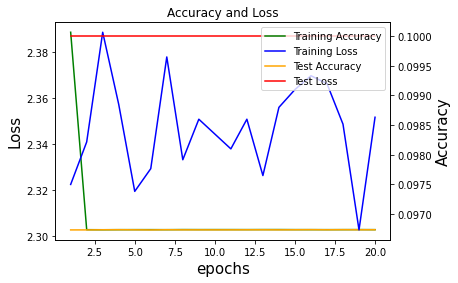

===================== 8 =====================
['RandomUniform', 'sigmoid', 'Adam', 'l2', False]
Train loss: 2.306157350540161
Train accuracy: 0.10000000149011612
Test loss: 2.306157112121582
Test accuracy: 0.10000000149011612


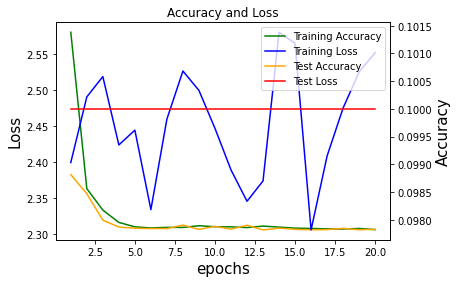

===================== 9 =====================
['RandomUniform', 'relu', 'RMSprop', 'l1', False]
Train loss: 6.76768159866333
Train accuracy: 0.10000000149011612
Test loss: 6.767678260803223
Test accuracy: 0.10000000149011612


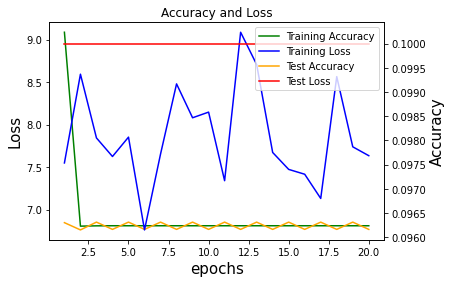

===================== 10 =====================
['RandomUniform', 'tanh', 'SGD', 'l2', True]
Train loss: 0.7002347111701965
Train accuracy: 0.8512333035469055
Test loss: 0.7262318730354309
Test accuracy: 0.8373000025749207


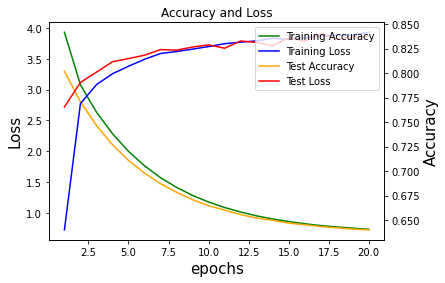

===================== 11 =====================
['RandomUniform', 'softmax', 'Adadelta', 'l1', True]
Train loss: 5.063486576080322
Train accuracy: 0.10000000149011612
Test loss: 5.063490390777588
Test accuracy: 0.10000000149011612


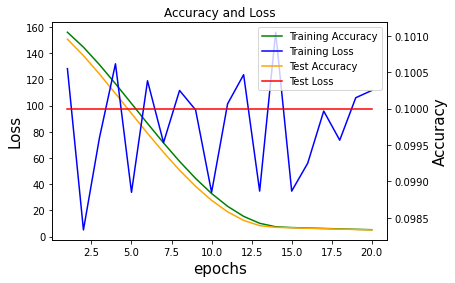

===================== 12 =====================
['RandomNormal', 'sigmoid', 'RMSprop', 'l2', True]
Train loss: 2.3113133907318115
Train accuracy: 0.10000000149011612
Test loss: 2.311314344406128
Test accuracy: 0.10000000149011612


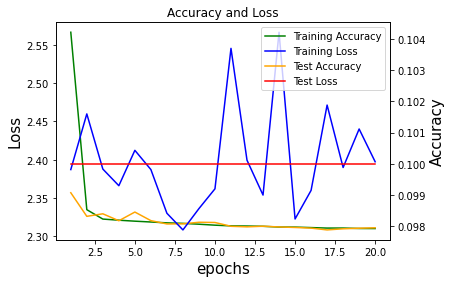

===================== 13 =====================
['RandomNormal', 'relu', 'Adam', 'l1', True]
Train loss: 3.7462358474731445
Train accuracy: 0.10000000149011612
Test loss: 3.746239423751831
Test accuracy: 0.10000000149011612


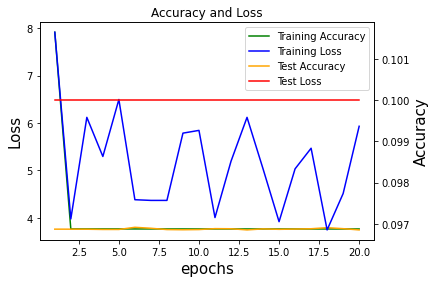

===================== 14 =====================
['RandomNormal', 'tanh', 'Adadelta', 'l2', False]
Train loss: 3.1172077655792236
Train accuracy: 0.7792999744415283
Test loss: 3.1383421421051025
Test accuracy: 0.7664999961853027


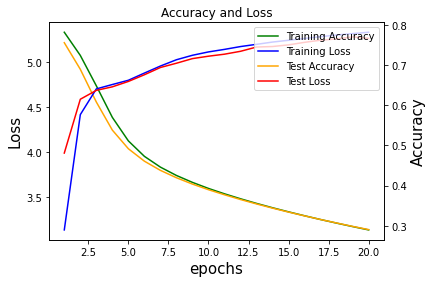

===================== 15 =====================
['RandomNormal', 'softmax', 'SGD', 'l1', False]
Train loss: 2.9029135704040527
Train accuracy: 0.10000000149011612
Test loss: 2.9029273986816406
Test accuracy: 0.10000000149011612


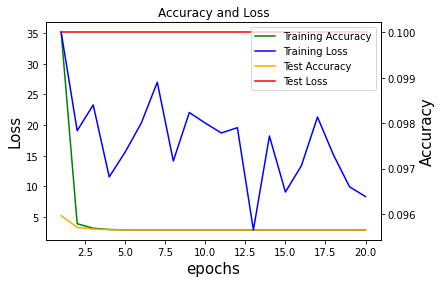

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

batch_size = 128
num_classes = 10
epochs = 20
ini = ['Ones', 'Zeros', 'RandomUniform', 'RandomNormal']
regu = ['l1', 'l2', 'l1', 'l2']; drop = [True, True, False, False]

acti = ['sigmoid', 'relu', 'tanh', 'softmax']
opti = ['SGD', "Adadelta", 'Adam', 'RMSprop']
cnn_parameters = [ [ini[0], acti[0], opti[0], regu[0], drop[0]],
                    [ini[0], acti[1], opti[1], regu[1], drop[1]],
                    [ini[0], acti[2], opti[2], regu[2], drop[2]],
                    [ini[0], acti[3], opti[3], regu[3], drop[3]],
                    [ini[1], acti[0], opti[1], regu[2], drop[2]],
                    [ini[1], acti[1], opti[0], regu[3], drop[3]],
                    [ini[1], acti[2], opti[3], regu[0], drop[0]],
                    [ini[1], acti[3], opti[2], regu[1], drop[1]],
                    [ini[2], acti[0], opti[2], regu[3], drop[3]],
                    [ini[2], acti[1], opti[3], regu[2], drop[2]],
                    [ini[2], acti[2], opti[0], regu[1], drop[1]],
                    [ini[2], acti[3], opti[1], regu[0], drop[0]],
                    [ini[3], acti[0], opti[3], regu[1], drop[1]],
                    [ini[3], acti[1], opti[2], regu[0], drop[0]],
                    [ini[3], acti[2], opti[1], regu[3], drop[3]],
                    [ini[3], acti[3], opti[0], regu[2], drop[2]],]


# mlp_setups = ['glorot_normal', 'relu', 'rmsprop', 'l2']

# mnist cnn
print('Minist CNN')
for i in range(len(cnn_parameters)):
    print('=====================', i ,'=====================')
    print(cnn_parameters[i])
    Mnist_cnn.network(  x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = cnn_parameters[i][0],
                        regularizer = cnn_parameters[i][3],
                        activation = cnn_parameters[i][1],
                        optimizer = cnn_parameters[i][2],
                        dropout = cnn_parameters[i][4],
                        plot_num = i)

### Minist MLP

Minist MLP
===================== 0 =====================
['Ones', 'l1', 'relu', 'SGD']
Test loss: 5492.66845703125
Test accuracy: 0.382999986410141


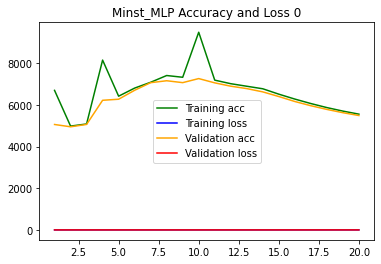

===================== 1 =====================
['RandomUniform', 'l1', 'relu', 'SGD']
Test loss: 2.6368250846862793
Test accuracy: 0.10000000149011612


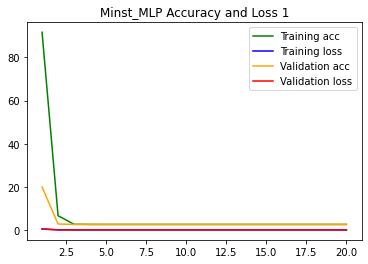

===================== 2 =====================
['RandomUniform', 'l2', 'relu', 'SGD']
Test loss: 1.0864930152893066
Test accuracy: 0.8144999742507935


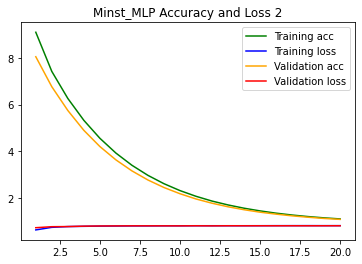

===================== 3 =====================
['RandomUniform', 'l2', 'relu', 'Adam']
Test loss: 0.9139146208763123
Test accuracy: 0.7897999882698059


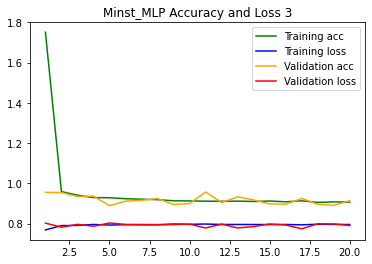

===================== 4 =====================
['RandomUniform', 'l2', 'sigmoid', 'SGD']
Test loss: 1.9382213354110718
Test accuracy: 0.5723000168800354


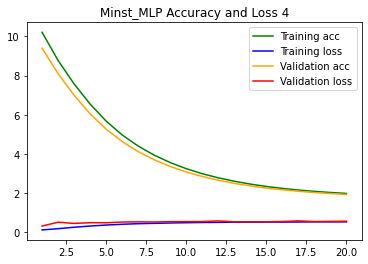

===================== 5 =====================
['RandomUniform', 'l2', 'sigmoid', 'Adam']
Test loss: 1.7283662557601929
Test accuracy: 0.5745999813079834


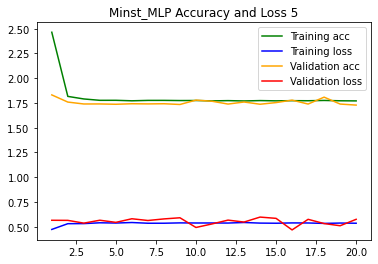

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

batch_size = 128
num_classes = 10
epochs = 20

ini = ['Ones', 'Zeros', 'RandomUniform', 'RandomNormal']
regu = ['l1', 'l2', 'l1', 'l2']; drop = [True, True, False, False]

acti = ['sigmoid', 'relu', 'tanh', 'softmax']
opti = ['SGD', 'SGD(learning_rate=0.003)', 'Adam', 'Adam(learning_rate=0.003)']
mlp_parameters = [ [ini[0], acti[0], opti[0], regu[0], drop[0]],
                    [ini[0], acti[1], opti[1], regu[1], drop[1]],
                    [ini[0], acti[2], opti[2], regu[2], drop[2]],
                    [ini[0], acti[3], opti[3], regu[3], drop[3]],
                    [ini[1], acti[0], opti[1], regu[2], drop[2]],
                    [ini[1], acti[1], opti[0], regu[3], drop[3]],
                    [ini[1], acti[2], opti[3], regu[0], drop[0]],
                    [ini[1], acti[3], opti[2], regu[1], drop[1]],
                    [ini[2], acti[0], opti[2], regu[3], drop[3]],
                    [ini[2], acti[1], opti[3], regu[2], drop[2]],
                    [ini[2], acti[2], opti[0], regu[1], drop[1]],
                    [ini[2], acti[3], opti[1], regu[0], drop[0]],
                    [ini[3], acti[0], opti[3], regu[1], drop[1]],
                    [ini[3], acti[1], opti[2], regu[0], drop[0]],
                    [ini[3], acti[2], opti[1], regu[3], drop[3]],
                    [ini[3], acti[3], opti[0], regu[2], drop[2]],]


# mlp_setups = ['glorot_normal', 'relu', 'rmsprop', 'l2']

# mnist MLP
print('Minist MLP')
for i in range(len(mlp_parameters)):
    print('=====================', i ,'=====================')
    print(mlp_parameters[i])
    Mnist_mlp.network(  x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = mlp_parameters[i][0],
                        regularizer = mlp_parameters[i][3],
                        activation = mlp_parameters[i][1],
                        optimizer = mlp_parameters[i][2],
                        dropout = mlp_parameters[i][4],
                        plot_num = i)

Minist MLP
===================== 0 =====================
['RandomUniform', 'l2', 'relu', 'SGD']
Test loss: 0.865041971206665
Test accuracy: 0.8141999840736389


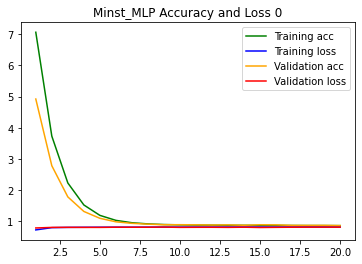

===================== 1 =====================
['RandomUniform', 'l2', 'relu', 'Adam']
Test loss: 0.9749014377593994
Test accuracy: 0.7545999884605408


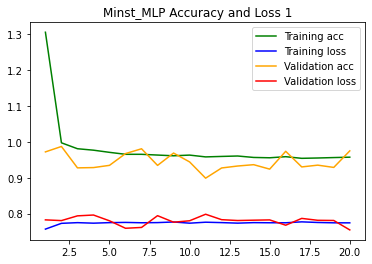

In [3]:
batch_size = 32
num_classes = 10
epochs = 20

mlp_parameters = [  ['RandomUniform', 'l2', 'relu', 'SGD'],
                    ['RandomUniform', 'l2', 'relu', 'Adam']]


# mlp_setups = ['glorot_normal', 'relu', 'rmsprop', 'l2']

# mnist MLP
print('Minist MLP')
for i in range(len(mlp_parameters)):
    print('=====================', i ,'=====================')
    print(mlp_parameters[i])
    Mnist_mlp.network(  x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = mlp_parameters[i][0],
                        regularizer = mlp_parameters[i][1],
                        activation = mlp_parameters[i][2],
                        optimizer = mlp_parameters[i][3],
                        plot_num = i)

### CIFAR-10 cnn

In [ ]:
batch_size = 32
num_classes = 10
epochs = 20

cnn_parameters = [  ['RandomUniform', 'l2', 'relu', 'SGD'],
                    ['RandomUniform', 'l2', 'relu', 'Adam']]


# mlp_setups = ['glorot_normal', 'relu', 'rmsprop', 'l2']

# mnist cnn
print('Minist CNN')
for i in range(len(cnn_parameters)):
    j = i + 10
    print('=====================', i ,'=====================')
    print(cnn_parameters[i])
    Cifar10_cnn.network(  x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = cnn_parameters[i][0],
                        regularizer = cnn_parameters[i][1],
                        activation = cnn_parameters[i][2],
                        optimizer = cnn_parameters[i][3],
                        plot_num = j)

Minist CNN
===================== 0 =====================
['RandomUniform', 'l2', 'relu', 'SGD']
Test loss: 1.6433113813400269
Test accuracy: 0.5321999788284302


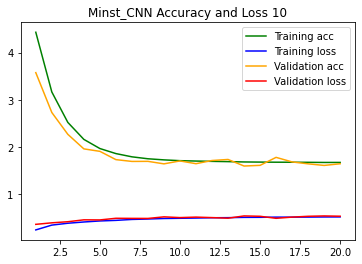

===================== 1 =====================
['RandomUniform', 'l2', 'relu', 'Adam']
Test loss: 1.826419711112976
Test accuracy: 0.4332999885082245


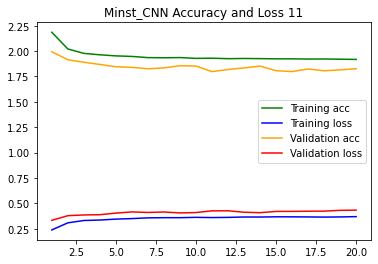

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
batch_size = 32
num_classes = 10
epochs = 20

cnn_parameters = [  ['RandomUniform', 'l2', 'relu', 'SGD'],
                    ['RandomUniform', 'l2', 'relu', 'Adam']]


# mlp_setups = ['glorot_normal', 'relu', 'rmsprop', 'l2']

# mnist cnn
print('Minist CNN')
for i in range(len(cnn_parameters)):
    j = i + 10
    print('=====================', i ,'=====================')
    print(cnn_parameters[i])
    Cifar10_cnn.network(  x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = cnn_parameters[i][0],
                        regularizer = cnn_parameters[i][1],
                        activation = cnn_parameters[i][2],
                        optimizer = cnn_parameters[i][3],
                        plot_num = j)

Minist CNN
===================== 0 =====================
['RandomUniform', 'l2', 'relu', 'SGD']
Test loss: 1.8171521425247192
Test accuracy: 0.46939998865127563


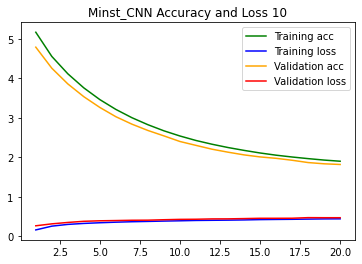

===================== 1 =====================
['RandomUniform', 'l2', 'relu', 'Adam']
Test loss: 1.7023375034332275
Test accuracy: 0.4952999949455261


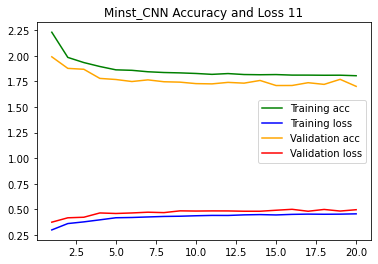

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
batch_size = 128
num_classes = 10
epochs = 20

cnn_parameters = [  ['RandomUniform', 'l2', 'relu', 'SGD'],
                    ['RandomUniform', 'l2', 'relu', 'Adam']]


# mlp_setups = ['glorot_normal', 'relu', 'rmsprop', 'l2']

# mnist cnn
print('Minist CNN')
for i in range(len(cnn_parameters)):
    j = i + 10
    print('=====================', i ,'=====================')
    print(cnn_parameters[i])
    Cifar10_cnn.network(  x_train, y_train, 
                        x_test, y_test,
                        batch_size, 
                        num_classes, 
                        epochs,
                        initializer = cnn_parameters[i][0],
                        regularizer = cnn_parameters[i][1],
                        activation = cnn_parameters[i][2],
                        optimizer = cnn_parameters[i][3],
                        plot_num = j)

---